In [ ]:
# Zomato Porject Python 

In [3]:
# Importing libraries in it 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
dataframe= pd.read_csv ("Zomato data .csv")
print (dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [7]:
dataframe= pd.read_csv("Zomato data .csv")

In [8]:
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [9]:
def handlerate(value):
    value =str(value).split('/')
    value =value[0];
    return float (value)
dataframe ['rate'] = dataframe['rate'].apply(handlerate)
print(dataframe.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


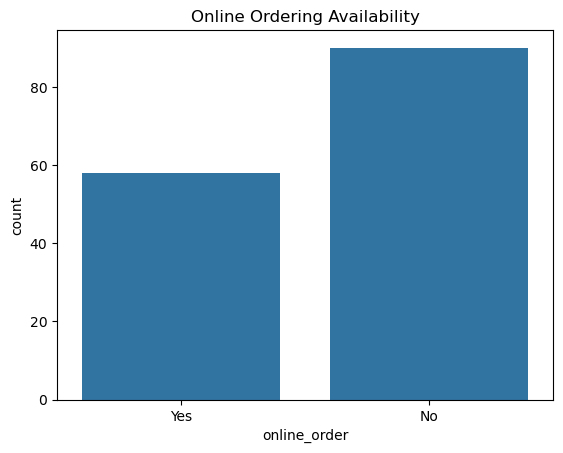

In [18]:
# 1. How many restaurants allow online orders?
sns.countplot(x='online_order', data=dataframe)
plt.title("Online Ordering Availability")
plt.show()


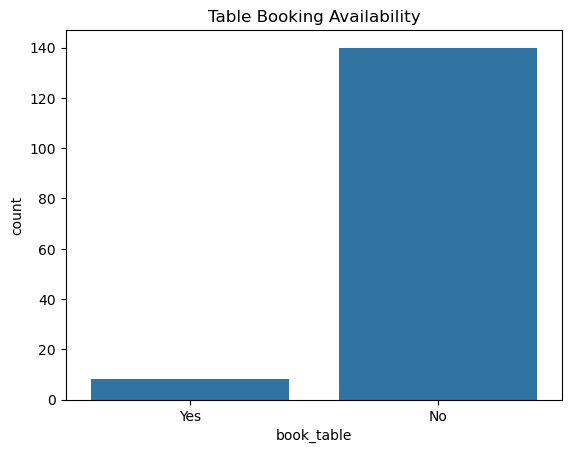

In [19]:
# 2. How many restaurants offer table booking?
sns.countplot(x='book_table', data=dataframe)
plt.title("Table Booking Availability")
plt.show()


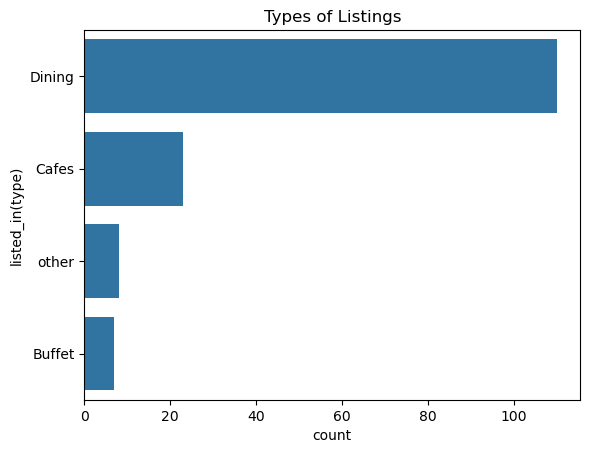

In [20]:
# 3. Which type of listing (e.g., Buffet, Delivery) is most common?
sns.countplot(y='listed_in(type)', data=dataframe, order=dataframe['listed_in(type)'].value_counts().index)
plt.title("Types of Listings")
plt.show()


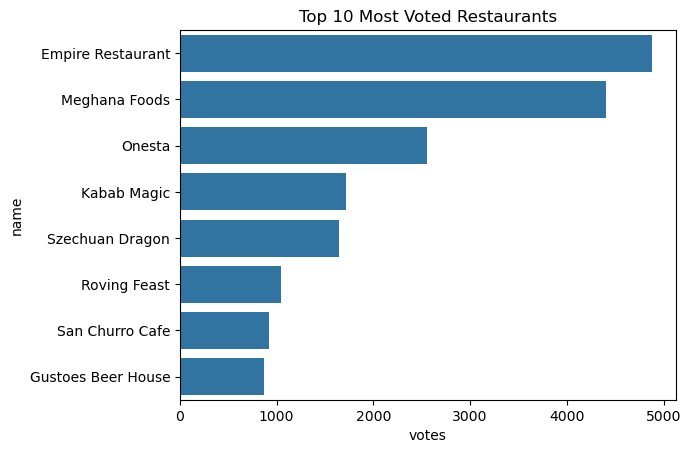

In [21]:
# 4. What are the top 10 most voted restaurants?
top_votes = dataframe.sort_values(by='votes', ascending=False).head(10)
sns.barplot(x='votes', y='name', data=top_votes)
plt.title("Top 10 Most Voted Restaurants")
plt.show()


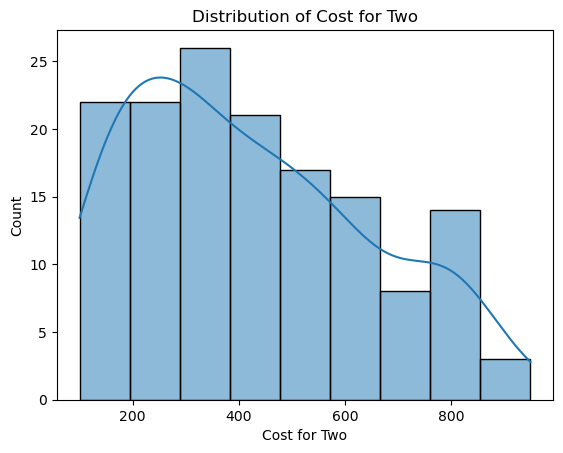

In [22]:
# 5. Distribution of Approximate Cost for Two People.
sns.histplot(dataframe['approx_cost(for two people)'], kde=True)
plt.title("Distribution of Cost for Two")
plt.xlabel("Cost for Two")
plt.show()


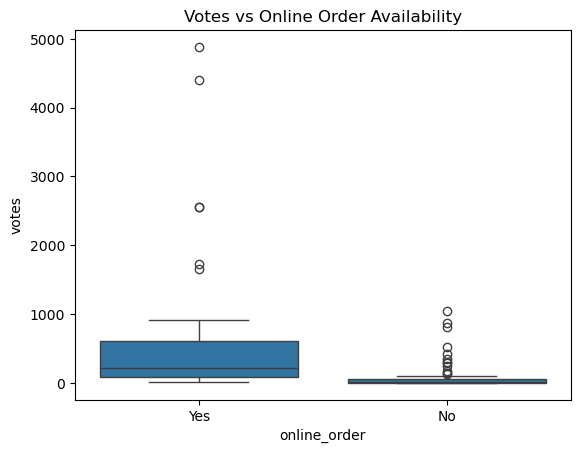

In [26]:
# 6. What is the relationship between online order availability and votes?
sns.boxplot(x='online_order', y='votes', data=dataframe)
plt.title("Votes vs Online Order Availability")
plt.show()


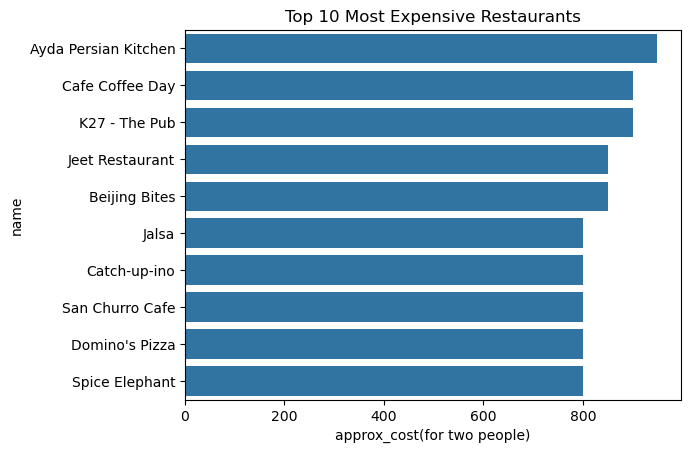

In [27]:
# 7. Which restaurants have the highest average cost for two people?
top_cost = dataframe.sort_values(by='approx_cost(for two people)', ascending=False).head(10)
sns.barplot(x='approx_cost(for two people)', y='name', data=top_cost)
plt.title("Top 10 Most Expensive Restaurants")
plt.show()


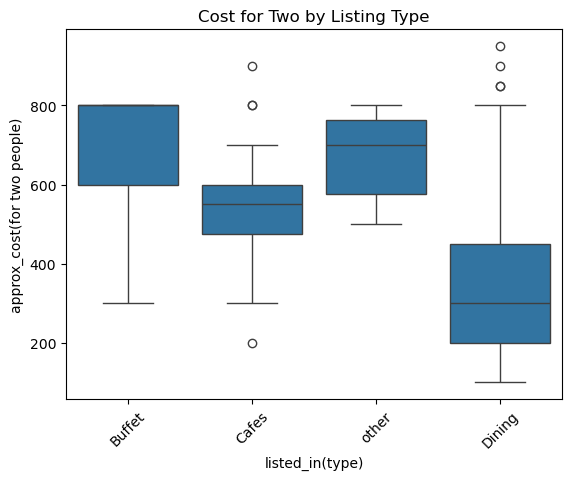

In [28]:
# 8. Comparison of cost distribution based on listing type.
sns.boxplot(x='listed_in(type)', y='approx_cost(for two people)', data=dataframe)
plt.title("Cost for Two by Listing Type")
plt.xticks(rotation=45)
plt.show()


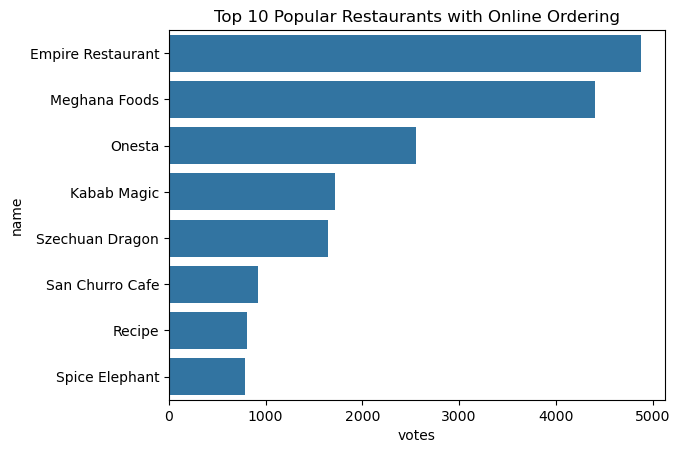

In [29]:
# 9. Top 10 most popular restaurants (based on votes and online order availability) .
popular = dataframe[dataframe['online_order'] == 'Yes'].sort_values(by='votes', ascending=False).head(10)
sns.barplot(x='votes', y='name', data=popular)
plt.title("Top 10 Popular Restaurants with Online Ordering")
plt.show()


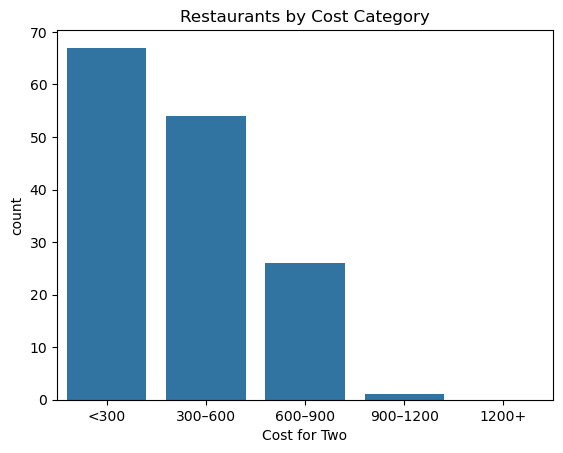

In [30]:
# 10. How many restaurants fall into each cost category (binned)?
bins = [0, 300, 600, 900, 1200, 1500]
labels = ['<300', '300–600', '600–900', '900–1200', '1200+']
dataframe['cost_category'] = pd.cut(dataframe['approx_cost(for two people)'], bins=bins, labels=labels)
sns.countplot(x='cost_category', data=dataframe)
plt.title("Restaurants by Cost Category")
plt.xlabel("Cost for Two")
plt.show()
